<a href="https://colab.research.google.com/github/Kisna2512/DSBDA_Lab/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
# Importing DataSet and take a look at Data
Boston = pd.read_csv("housing.csv")
Boston.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
Boston.info()
Boston.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='RM', ylabel='MEDV'>

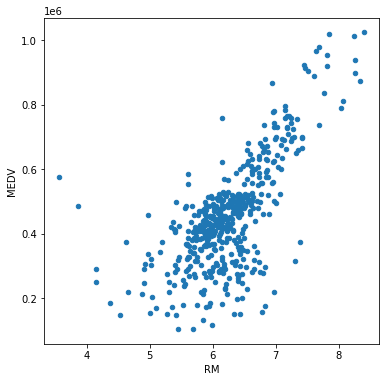

In [5]:
Boston.plot.scatter('RM', 'MEDV', figsize=(6, 6))

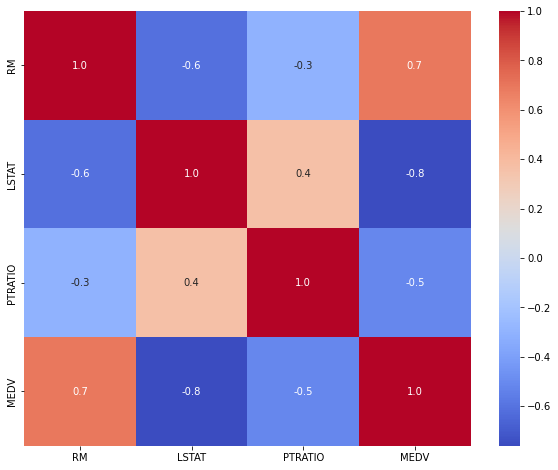

In [6]:
plt.subplots(figsize=(10,8))
sns.heatmap(Boston.corr(), cmap = 'coolwarm', annot = True, fmt = '.1f');

In [10]:
X = Boston[Boston.columns[:-1]]
Y = Boston['MEDV']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [11]:
# Split DataSet
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
sc_X = StandardScaler()
X_train_ = sc_X.fit_transform(X_train)
X_test_ = sc_X.transform(X_test)

In [12]:
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test  Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (342, 3), Y: (342,)
Test  Dataset Size - X: (147, 3), Y: (147,)


In [13]:

# Model Building
lm = LinearRegression()
lm.fit(X_train_, Y_train)
predictions = lm.predict(X_test_)

LinearRegression()

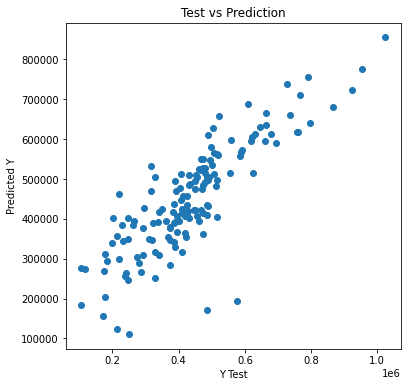

In [14]:
# Model Visualization
plt.figure(figsize=(6, 6));
plt.scatter(Y_test, predictions);
plt.xlabel('Y Test');
plt.ylabel('Predicted Y');
plt.title('Test vs Prediction');

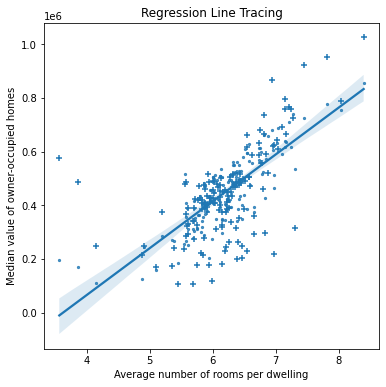

In [15]:
plt.figure(figsize=(6, 6));
sns.regplot(x = X_test['RM'], y = predictions, scatter_kws={'s':5});
plt.scatter(X_test['RM'], Y_test, marker = '+');
plt.xlabel('Average number of rooms per dwelling');
plt.ylabel('Median value of owner-occupied homes');
plt.title('Regression Line Tracing');


In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 69000.96874000518
Mean Square Error: 8678704841.446598
Root Mean Square Error: 93159.56655892404


In [17]:
# Model Coefficients
coefficients = pd.DataFrame(lm.coef_.round(2), X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
RM,66998.55
LSTAT,-63781.53
PTRATIO,-40594.96
